### Health Status of child 
* Average weight and  income corelation*
* Weight and continent corelation

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly as pl
import seaborn as sns

In [2]:
df = pd.read_csv('data/Child malnutrition.csv')

In [3]:
df.head(5)

,ISO code,Sex,Age,Height,Weight,Continent,World Bank,Wasting,Overweight,Stunting,...,Unnamed: 1014,Unnamed: 1015,Unnamed: 1016,Unnamed: 1017,Unnamed: 1018,Unnamed: 1019,Unnamed: 1020,Unnamed: 1021,Unnamed: 1022,Unnamed: 1023
0,AFG,1,2,93,16,Asia,Low Income,18.2,6.5,53.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,1,4,97,15,Asia,Low Income,8.6,4.6,59.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,0,4,90,12,Asia,Low Income,9.5,5.4,40.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,0,2,78,16,Europe,Upper Middle Income,8.1,9.5,20.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALB,0,4,99,13,Europe,Upper Middle Income,12.2,30.0,39.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['ISO code', 'Sex', 'Age', 'Height', 'Weight', 'Continent', 'World Bank',
       'Wasting', 'Overweight', 'Stunting',
       ...
       'Unnamed: 1014', 'Unnamed: 1015', 'Unnamed: 1016', 'Unnamed: 1017',
       'Unnamed: 1018', 'Unnamed: 1019', 'Unnamed: 1020', 'Unnamed: 1021',
       'Unnamed: 1022', 'Unnamed: 1023'],
      dtype='object', length=1024)

In [5]:
column_counts = df['Overweight'].value_counts()

print(column_counts)

4.9     13
4.7     13
4.0     12
6.2     11
1.6     11
        ..
13.2     1
23.4     1
25.2     1
20.8     1
10.6     1
Name: Overweight, Length: 175, dtype: int64


In [6]:
df['Overweight'] = df['Overweight'].astype(float)

In [7]:
df2 = df.groupby('World Bank')['Overweight'].mean().sort_values()
df2

World Bank
Low Income             4.308609
Lower Middle Income    6.026692
High Income            8.050000
Upper Middle Income    8.503518
Name: Overweight, dtype: float64

Text(0.5, 1.0, 'Child Average Weight Ratings By Income')

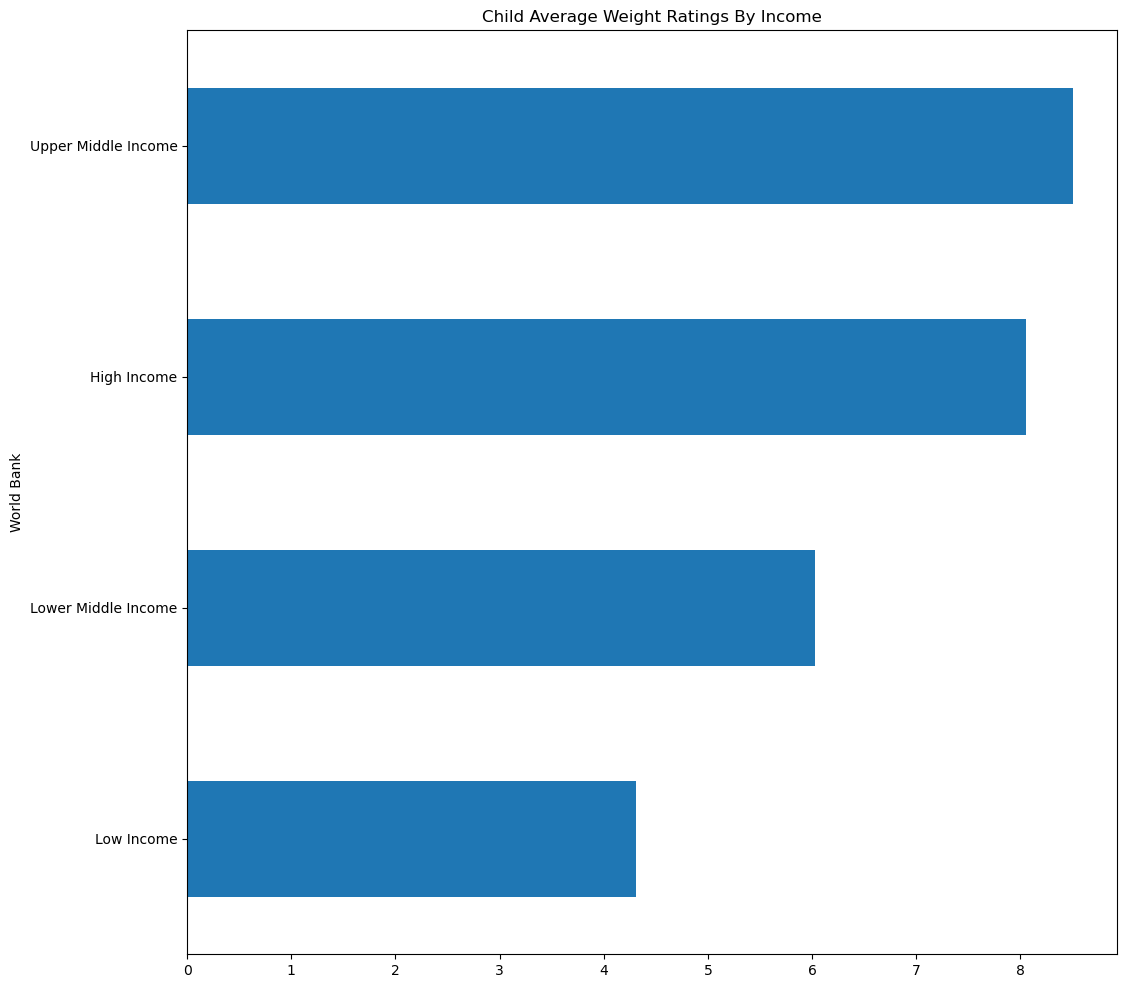

In [8]:
plt.figure(figsize = (12, 12))
df2.plot(kind = 'barh')

plt.title("Child Average Weight Ratings By Income")

In [9]:
type(df2)

pandas.core.series.Series

In [10]:
df3 = df.groupby('Continent')['Overweight'].mean().sort_values()
df3

Continent
Asia                                5.809417
Africa                              6.083137
Oceania                             6.372222
Latin America and the Caribbean     7.117532
Northern America                    7.450000
Europe                             13.967857
Name: Overweight, dtype: float64

Text(0.5, 1.0, 'Child Average Weight Ratings By Continent')

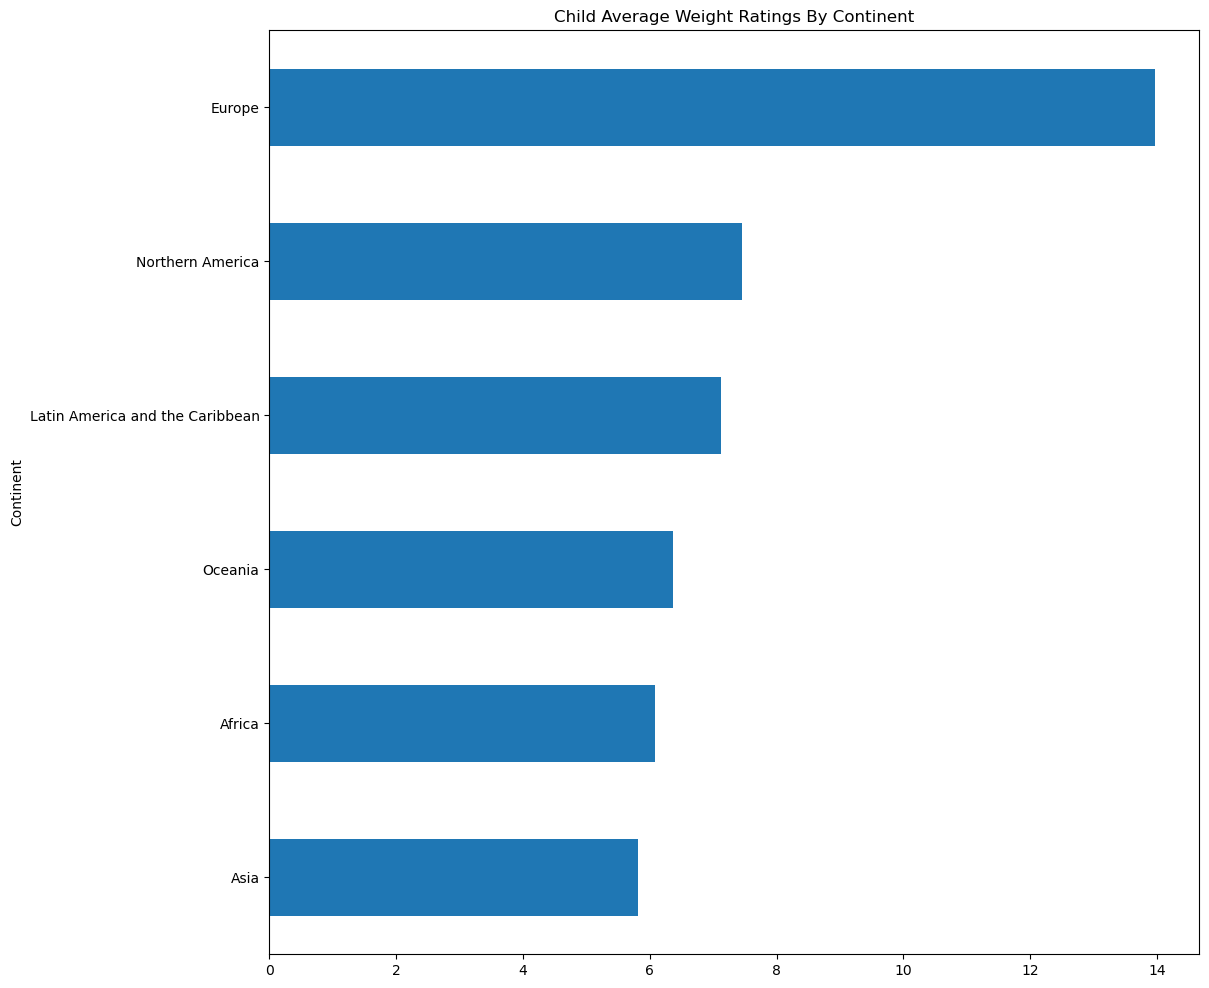

In [11]:
plt.figure(figsize = (12, 12))
df3.plot(kind = 'barh')

plt.title("Child Average Weight Ratings By Continent")



## 4 Major Health Issues in USA from 2004 to 2017

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pl



In [13]:
health_df = pd.read_csv('data/4healthissues.csv')

In [14]:
health_df.head(3)

,StateAbbr,2004+cardiovascular,2004+stroke,2004+obesity,2004+diabetes,2005+cardiovascular,2005+stroke,2005+obesity,2005+diabetes,2006+cardiovascular,...,2015+obesity,2015+diabetes,2016+cardiovascular,2016+stroke,2016+obesity,2016+diabetes,2017+cardiovascular,2017+stroke,2017+obesity,2017+diabetes
0,ME,6,17,29,38,16,38,14,23,23,...,48,73,38,70,49,81,37,83,47,80
1,NY,6,13,27,32,15,35,15,19,18,...,46,63,41,47,49,77,34,53,52,78
2,NY,3,16,31,37,8,44,24,18,19,...,67,75,33,66,70,74,24,71,61,72


In [15]:
# health_df.info(verbose=True)

In [16]:
health_df.columns

Index(['StateAbbr', '2004+cardiovascular', '2004+stroke', '2004+obesity',
       '2004+diabetes', '2005+cardiovascular', '2005+stroke', '2005+obesity',
       '2005+diabetes', '2006+cardiovascular', '2006+stroke', '2006+obesity',
       '2006+diabetes', '2007+cardiovascular', '2007+stroke', '2007+obesity',
       '2007+diabetes', '2008+cardiovascular', '2008+stroke', '2008+obesity',
       '2008+diabetes', '2009+cardiovascular', '2009+stroke', '2009+obesity',
       '2009+diabetes', '2010+cardiovascular', '2010+stroke', '2010+obesity',
       '2010+diabetes', '2011+cardiovascular', '2011+stroke', '2011+obesity',
       '2011+diabetes', '2012+cardiovascular', '2012+stroke', '2012+obesity',
       '2012+diabetes', '2013+cardiovascular', '2013+stroke', '2013+obesity',
       '2013+diabetes', '2014+cardiovascular', '2014+stroke', '2014+obesity',
       '2014+diabetes', '2015+cardiovascular', '2015+stroke', '2015+obesity',
       '2015+diabetes', '2016+cardiovascular', '2016+stroke', '2016+

In [17]:
# column_names = health_df.columns.tolist()
# new_column_names = {col:col.replace('+', '_') for col in column_names}
# health_df = health_df.rename(columns=new_column_names)

In [18]:
column_names = health_df.columns.tolist()
new_column_names = {col: col.replace('+', '_') for col in column_names if col != 'StateAbbr'}
health_df = health_df.rename(columns=new_column_names)


In [19]:
health_df

,StateAbbr,2004_cardiovascular,2004_stroke,2004_obesity,2004_diabetes,2005_cardiovascular,2005_stroke,2005_obesity,2005_diabetes,2006_cardiovascular,...,2015_obesity,2015_diabetes,2016_cardiovascular,2016_stroke,2016_obesity,2016_diabetes,2017_cardiovascular,2017_stroke,2017_obesity,2017_diabetes
0,ME,6,17,29,38,16,38,14,23,23,...,48,73,38,70,49,81,37,83,47,80
1,NY,6,13,27,32,15,35,15,19,18,...,46,63,41,47,49,77,34,53,52,78
2,NY,3,16,31,37,8,44,24,18,19,...,67,75,33,66,70,74,24,71,61,72
3,GA,14,14,29,31,25,48,23,22,24,...,60,73,59,65,51,78,38,62,41,66
4,PA,7,16,30,37,17,39,18,23,24,...,56,72,42,56,52,80,35,61,56,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,CA,5,13,38,27,10,31,15,15,13,...,56,57,35,51,54,63,24,60,53,63
206,CA,4,17,29,35,13,45,19,23,16,...,58,73,38,57,48,75,29,64,55,76
207,CA,7,13,33,34,17,35,24,21,15,...,58,65,55,52,64,81,42,61,63,77
208,CA,4,22,41,24,10,45,38,19,10,...,60,66,36,67,63,75,38,76,62,75


In [20]:
# health_df.describe()

In [21]:
selected_State = ['CA','TX','FL','NY']
filtered_df = health_df[health_df['StateAbbr'].isin(selected_State)]

In [22]:
health_df_transposed = health_df.set_index('StateAbbr').T

In [23]:
health_df_transposed.head(10)

StateAbbr,ME,NY,NY,GA,PA,MI,NH,GA,PA,IN,...,OR,OR,CA,CA,NV,CA,CA,CA,CA,WA
2004_cardiovascular,6,6,3,14,7,6,6,11,10,4,...,4,12,5,4,4,5,4,7,4,6
2004_stroke,17,13,16,14,16,16,15,17,17,14,...,18,18,15,12,16,13,17,13,22,17
2004_obesity,29,27,31,29,30,27,27,45,35,25,...,29,46,22,26,17,38,29,33,41,30
2004_diabetes,38,32,37,31,37,34,37,26,43,36,...,36,45,29,32,30,27,35,34,24,46
2005_cardiovascular,16,15,8,25,17,14,16,11,17,13,...,14,17,12,12,10,10,13,17,10,16
2005_stroke,38,35,44,48,39,43,41,50,49,43,...,42,37,35,45,35,31,45,35,45,47
2005_obesity,14,15,24,23,18,18,15,18,20,25,...,18,19,15,17,10,15,19,24,38,24
2005_diabetes,23,19,18,22,23,20,22,25,26,20,...,20,18,20,20,18,15,23,21,19,19
2006_cardiovascular,23,18,19,24,24,21,20,23,23,17,...,14,18,16,20,15,13,16,15,10,18
2006_stroke,26,18,26,23,23,23,23,31,25,26,...,24,24,19,22,20,24,24,20,28,23


C:\Users\jinhe\OneDrive\Documents\Dev10\Anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


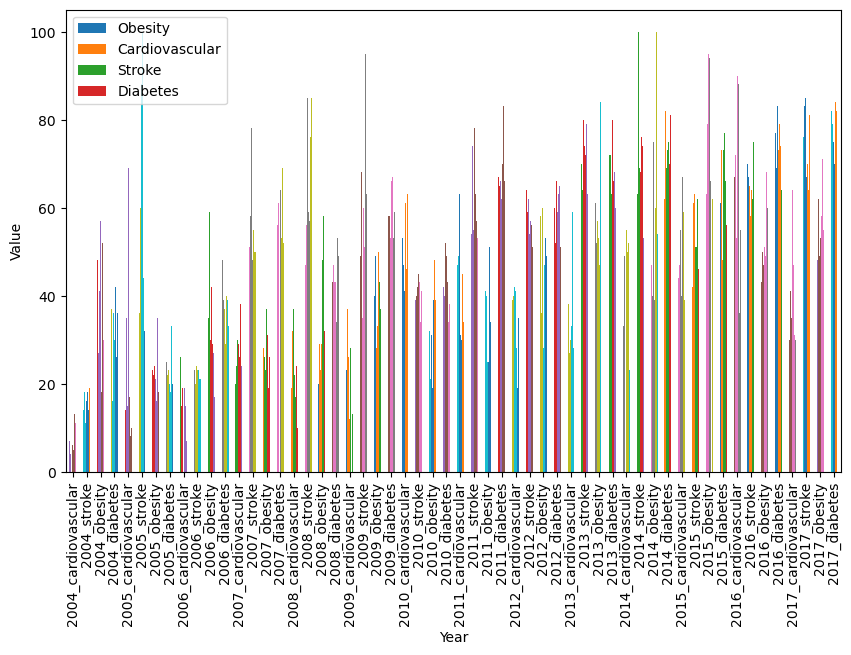

In [24]:
# Plot the transposed DataFrame
ax = health_df_transposed.plot(kind='bar', figsize=(10, 6))

# Set the x-axis label and y-axis label
ax.set_xlabel('Year')
ax.set_ylabel('Value')

# Add a legend
ax.legend(['Obesity', 'Cardiovascular', 'Stroke', 'Diabetes'])

plt.show()






In [25]:
df3 = health_df_transposed

In [26]:
df3.head(4)

StateAbbr,ME,NY,NY,GA,PA,MI,NH,GA,PA,IN,...,OR,OR,CA,CA,NV,CA,CA,CA,CA,WA
2004_cardiovascular,6,6,3,14,7,6,6,11,10,4,...,4,12,5,4,4,5,4,7,4,6
2004_stroke,17,13,16,14,16,16,15,17,17,14,...,18,18,15,12,16,13,17,13,22,17
2004_obesity,29,27,31,29,30,27,27,45,35,25,...,29,46,22,26,17,38,29,33,41,30
2004_diabetes,38,32,37,31,37,34,37,26,43,36,...,36,45,29,32,30,27,35,34,24,46


In [27]:
# fig, ax = plt.subplots(figsize=(10, 6))
# for column in df3.columns:
#     ax.plot(df3.index, df3[column], marker='o', label=column)

# ax.set_xlabel('Year')
# ax.set_ylabel('Value')
# ax.set_title('Line Graph')

# # Add a legend
# ax.legend()

# plt.show()

In [28]:
# health_df['StateAbbr'].value_counts()

In [29]:
health_df

,StateAbbr,2004_cardiovascular,2004_stroke,2004_obesity,2004_diabetes,2005_cardiovascular,2005_stroke,2005_obesity,2005_diabetes,2006_cardiovascular,...,2015_obesity,2015_diabetes,2016_cardiovascular,2016_stroke,2016_obesity,2016_diabetes,2017_cardiovascular,2017_stroke,2017_obesity,2017_diabetes
0,ME,6,17,29,38,16,38,14,23,23,...,48,73,38,70,49,81,37,83,47,80
1,NY,6,13,27,32,15,35,15,19,18,...,46,63,41,47,49,77,34,53,52,78
2,NY,3,16,31,37,8,44,24,18,19,...,67,75,33,66,70,74,24,71,61,72
3,GA,14,14,29,31,25,48,23,22,24,...,60,73,59,65,51,78,38,62,41,66
4,PA,7,16,30,37,17,39,18,23,24,...,56,72,42,56,52,80,35,61,56,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,CA,5,13,38,27,10,31,15,15,13,...,56,57,35,51,54,63,24,60,53,63
206,CA,4,17,29,35,13,45,19,23,16,...,58,73,38,57,48,75,29,64,55,76
207,CA,7,13,33,34,17,35,24,21,15,...,58,65,55,52,64,81,42,61,63,77
208,CA,4,22,41,24,10,45,38,19,10,...,60,66,36,67,63,75,38,76,62,75


### Machine Learning; linearRegression Model

In [31]:
df2 = pd.read_csv('data/PLACES__Local_Data_for_Better_Health__County_Data_2022_release.csv')

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [33]:
print(df2.columns)


Index(['Year', 'StateAbbr', 'StateDesc', 'LocationName', 'DataSource',
       'Category', 'Measure', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopulation',
       'LocationID', 'CategoryID', 'MeasureId', 'DataValueTypeID',
       'Short_Question_Text', 'Geolocation', 'States', 'Counties'],
      dtype='object')


In [35]:
df2 = df2.drop(columns=["Data_Value_Unit", "Data_Value_Footnote", "Data_Value_Footnote_Symbol","States","Counties", 
                   "Low_Confidence_Limit","High_Confidence_Limit", "DataSource","StateDesc"
                           ])

In [92]:
df2.head(5)

,Year,StateAbbr,LocationName,Category,Measure,Data_Value_Type,Data_Value,TotalPopulation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation
0,2020,WY,Teton,Health Status,Physical health not good for >=14 days among a...,Crude prevalence,7.3,23497,56039,HLTHSTAT,PHLTH,CrdPrv,Physical Health,POINT (-110.426087 44.048662)
1,2020,WY,Goshen,Health Status,Fair or poor self-rated health status among ad...,Crude prevalence,13.8,13235,56015,HLTHSTAT,GHLTH,CrdPrv,General Health,POINT (-104.3535403 42.0894553)
2,2020,WY,Laramie,Prevention,"Fecal occult blood test, sigmoidoscopy, or col...",Age-adjusted prevalence,61.6,100595,56021,PREVENT,COLON_SCREEN,AgeAdjPrv,Colorectal Cancer Screening,POINT (-104.660395 41.2928302)
3,2020,WY,Park,Prevention,Visits to doctor for routine checkup within th...,Crude prevalence,71.0,29331,56029,PREVENT,CHECKUP,CrdPrv,Annual Checkup,POINT (-109.5935975 44.4923865)
4,2020,WY,Lincoln,Health Outcomes,Chronic obstructive pulmonary disease among ad...,Age-adjusted prevalence,5.9,20253,56023,HLTHOUT,COPD,AgeAdjPrv,COPD,POINT (-110.6829614 42.2299932)


In [37]:
# df2.drop_duplicates()

In [93]:
selected_values = ['Stroke','Diabetes','Coronary Heart Disease','Obesity']

In [94]:
selected_df = df2[df2['Short_Question_Text'].isin(selected_values)] 

In [107]:
df2 = pd.get_dummies(selected_df.columns)
df2

,Category,CategoryID,DataValueTypeID,Data_Value,Data_Value_Type,Geolocation,LocationID,LocationName,Measure,MeasureId,Short_Question_Text,StateAbbr,TotalPopulation,Year
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
x= df2[selected_df.columns]
y= df2['Data_Value']

In [97]:
type(x), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [98]:
pd.set_option('display.max_columns', None)

In [99]:
xtr, xval, ytr, yval = train_test_split(x, y, random_state=42, test_size=0.25)

xtr.shape, xval.shape, ytr.shape, yval.shape

((10, 14), (4, 14), (10,), (4,))

In [100]:

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [101]:
# Obtain the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [0.26692952 0.26692952 0.26692952 0.26692952 0.26692952 0.26692952
 1.26692952 0.26692952 0.26692952 0.26692952 0.26692952 0.26692952
 0.26692952 0.26692952]
Intercept: -0.266929519978892


In [108]:
# import matplotlib.pyplot as plt

# # Scatter plot for 'Stroke'
# plt.scatter(selected_df['Data_Value'], selected_df['Short_Question_Text_Stroke'], label='Stroke', alpha=0.6)

# # Scatter plot for 'Diabetes'
# plt.scatter(selected_df['Data_Value'], selected_df['Short_Question_Text_Diabetes'], label='Diabetes', alpha=0.6)

# # Scatter plot for 'Coronary Heart Disease'
# plt.scatter(selected_df['Data_Value'], selected_df['Short_Question_Text_Coronary Heart Disease'], label='Coronary Heart Disease', alpha=0.6)

# # Scatter plot for 'Obesity'
# plt.scatter(selected_df['Data_Value'], selected_df['Short_Question_Text_Obesity'], label='Obesity', alpha=0.6)

# # Labeling and legend
# plt.xlabel("X - Values")
# plt.ylabel("Y - Health Issues")
# plt.legend()

# # Display the plot
# plt.show()


In [ ]:
selected_columns = ['Short_Question_Text_Stroke', 'Short_Question_Text_Diabetes', 'Short_Question_Text_Coronary Heart Disease', 'Short_Question_Text_Obesity']
selected_df = dummies_df[selected_columns]

In [ ]:
# Create a dictionary to map the old column names to the new column names
column_mapping = {
    'Short_Question_Text_Stroke': 'Stroke',
    'Short_Question_Text_Diabetes': 'Diabetes',
    'Short_Question_Text_Coronary Heart Disease': 'Coronary Heart Disease',
    'Short_Question_Text_Obesity': 'Obesity'
}

# Rename the columns using the dictionary
new_name_df = selected_df.rename(columns=column_mapping)

# Verify the updated column names
print(new_name_df.columns)


In [ ]:

import seaborn as sns

# Create a DataFrame with the selected columns


# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=new_name_df)
plt.xlabel('Health Issues')
plt.ylabel('Data Value')
plt.title('Violin Plot - Health Issues')
plt.show()






In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_name_df)
plt.xlabel('Health Issues')
plt.ylabel('Data Value')
plt.title('Box Plot - Health Issues')
plt.show()
